오토인코더 입력 데이터를 압축한 후 다시 복원하는 방식으로 작동한다.
 오토인코더의 목적은 입력 데이터의 중요한 특징을 추출하여 고차원 데이터를 저차원으로 변환하고, 다시 원래 데이터로 복원하는 것 

오토인코더의 기본 구조는 인코더와 디코더로 구성되는데:
* 인코더(Encoder): 입력 데이터를 저차원의 잠재 공간(latent space)으로 변환하는 역할을 합니다. 입력 데이터의 복잡한 구조를 저차원 표현으로 압축하는 것이 목적.
* 디코더(Decoder): 잠재 공간에서 압축된 데이터를 다시 원래 입력 데이터로 복원

![](https://images.squarespace-cdn.com/content/v1/62f1caa0a2cb083186ccce31/c3350b48-ff66-4e04-aa79-56cec8350ca2/autoencoder_architecture.png).

이떄 중간의 모래시계 허리부분에 생긴 병목을 latent space라고 한다. 가장 저차원의 표현을 담고 있게된다.
즉 모델은 필연적으로 가장 중요한 정보만을 남기도록 학습되게 된다.

입력데이터가 라벨데이터로도 쓰이므로 일종의 비지도 학습이 된다.

2024-10-20 20:18:46.108189: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-10-20 20:18:46.112113: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-10-20 20:18:46.132261: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-10-20 20:18:46.157485: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-10-20 20:18:46.182768: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been 

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


I0000 00:00:1729423129.732828  441329 cuda_executor.cc:1001] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-10-20 20:18:49.733252: W tensorflow/core/common_runtime/gpu/gpu_device.cc:2343] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


Epoch 1/50
  9/235 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 0.6707 

2024-10-20 20:18:51.102725: E tensorflow/core/util/util.cc:131] oneDNN supports DT_INT32 only on platforms with AVX-512. Falling back to the default Eigen-based implementation if present.


235/235 ━━━━━━━━━━━━━━━━━━━━ 5s 18ms/step - loss: 0.2906 - val_loss: 0.0958
Epoch 2/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 17ms/step - loss: 0.0938 - val_loss: 0.0854
Epoch 3/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 17ms/step - loss: 0.0853 - val_loss: 0.0813
Epoch 4/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - loss: 0.0816 - val_loss: 0.0790
Epoch 5/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 17ms/step - loss: 0.0795 - val_loss: 0.0771
Epoch 6/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - loss: 0.0777 - val_loss: 0.0760
Epoch 7/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 6s 25ms/step - loss: 0.0768 - val_loss: 0.0751
Epoch 8/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - loss: 0.0757 - val_loss: 0.0746
Epoch 9/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 17ms/step - loss: 0.0750 - val_loss: 0.0738
Epoch 10/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - loss: 0.0743 - val_loss: 0.0743
Epoch 11/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 17ms/step - loss: 0.0739 - val_loss: 0.0729
Epoch 12/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/ste

<function matplotlib.pyplot.show(close=None, block=None)>

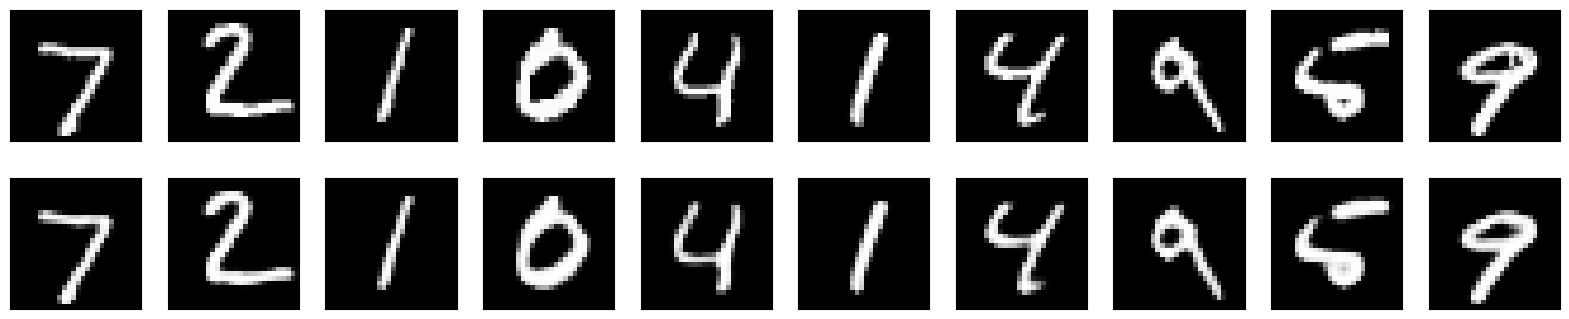

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D
from tensorflow.keras.models import Model
from tensorflow.keras.datasets import mnist

# MNIST 데이터 로드
(x_train, _), (x_test, _) = mnist.load_data()

# 데이터 전처리: 28x28 이미지에 채널을 추가 (흑백 이미지는 채널 1)
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = np.expand_dims(x_train, axis=-1)  # (60000, 28, 28, 1)
x_test = np.expand_dims(x_test, axis=-1)    # (10000, 28, 28, 1)

# LeNet 기반 컨볼루셔널 오토인코더 모델 정의

# 인코더 부분 (LeNet 스타일)
input_img = Input(shape=(28, 28, 1))  # 입력: 28x28x1 이미지

encoded = Conv2D(6, (5, 5), activation='relu', padding='same')(input_img)  # 28x28x6
encoded = MaxPooling2D((2, 2), padding='same')(encoded)  # 14x14x6
encoded = Conv2D(16, (5, 5), activation='relu', padding='same')(encoded)  # 14x14x16
encoded = MaxPooling2D((2, 2), padding='same')(encoded)  # 7x7x16

# 디코더 부분
decoded = Conv2D(16, (5, 5), activation='relu', padding='same')(encoded)  # 7x7x16
decoded = UpSampling2D((2, 2))(decoded)  # 14x14x16
decoded = Conv2D(6, (5, 5), activation='relu', padding='same')(decoded)  # 14x14x6
decoded = UpSampling2D((2, 2))(decoded)  # 28x28x6

decoded = Conv2D(1, (5, 5), activation='sigmoid', padding='same')(decoded)  # 28x28x1 (출력)

# 오토인코더 모델 구성 (인코더 + 디코더)
autoencoder = Model(input_img, decoded)

# 모델 컴파일
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

# 모델 학습
autoencoder.fit(x_train, x_train,
                epochs=50,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))

# 테스트 데이터 인코딩 및 디코딩
decoded_imgs = autoencoder.predict(x_test)

# 복원된 이미지 시각화
n = 10  # 10개의 이미지를 시각화
plt.figure(figsize=(20, 4))
for i in range(n):
    # 원본 이미지 표시
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # 복원된 이미지 표시
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show
